In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [4]:
df.index.freq = 'MS'

In [7]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [28]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], 
                trend='add', seasonal='add', seasonal_periods=12).fit()

C:\Users\letha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [29]:
test_predictions = fitted_model.forecast(36)

In [30]:
test_predictions.head()

1958-02-01    341.313860
1958-03-01    394.102167
1958-04-01    385.612959
1958-05-01    391.721538
1958-06-01    454.378332
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

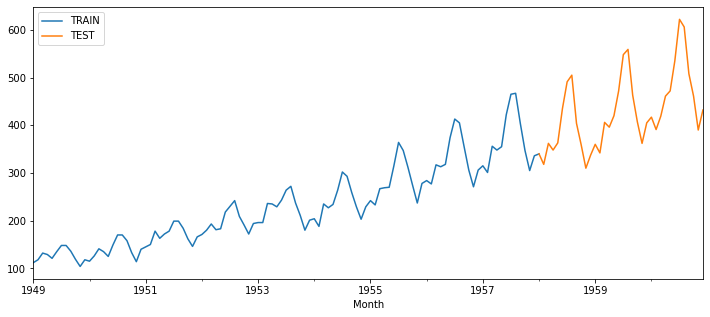

In [31]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')

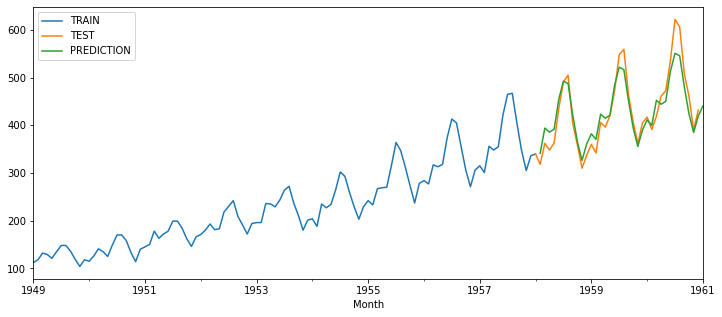

In [35]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', 
                                           figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION');

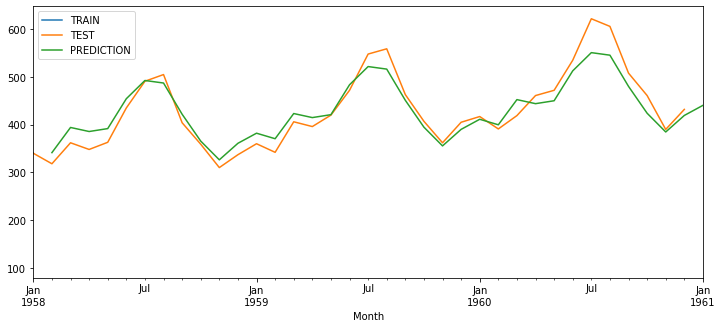

In [36]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', 
                                           figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION', 
                      xlim=['1958-01-01', '1961-01-01']);

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
mean_absolute_error(test_data,test_predictions)

45.89174546790784

In [44]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [42]:
mean_squared_error(test_data,test_predictions)

3083.065751400763

In [45]:
np.sqrt(mean_squared_error(test_data,test_predictions))

55.52536133516614

In [46]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], 
                                   trend='add', seasonal='add', 
                                   seasonal_periods=12).fit()

C:\Users\letha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [47]:
forecast_predictions = final_model.forecast(36)

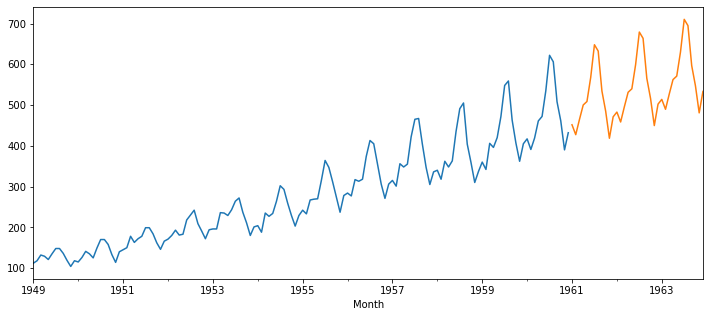

In [50]:
df['Thousands of Passengers'].plot(figsize=(12,5))
forecast_predictions.plot();